In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,3,3)

In [3]:
df= sago.get_aligned_signal_componets()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
def triangle_vertices(df, group,signal_type):
    # Using the order of vertices in wikipedia under "Law of Cosines"
    # A = (0,0)
    # B = (x1,0)
    # a < b
    cols = [c for c in df.columns if c[0]==group and c[1].startswith(signal_type)]
    #print(cols)
    cosine_simi = np.corrcoef(df[cols].values.T)
    angular_dist = np.arccos(cosine_simi)/np.pi
    corrs = sorted([angular_dist[0,1], angular_dist[1,2], angular_dist[2,0]])
    #print(corrs)
    a,b,c = corrs[1], corrs[2], corrs[0]
    #print("{:.2f}".format((a+b)/(a+c)))
    cos_alpha = (b**2 + c**2 - a**2)/(2*b*c)
    if cos_alpha > 1:
        print(corrs)
        return
    sin_alpha = np.sqrt(1-cos_alpha**2)
    A = np.zeros(2)
    C = np.array((b*cos_alpha, b*sin_alpha))
    B = np.array((c,0))
    return np.vstack([A,B,C,A])
    
    

In [5]:
p = triangle_vertices(df, 1001, "Sg_")

In [ ]:
np.linalg.norm(p1-p2)

In [ ]:
np.linalg.norm(p2)

In [ ]:
p

In [ ]:
plt.plot(p[:,0],p[:,1])
plt.xlim([0,1])

In [6]:
def extract_ratio(p):
    a = np.linalg.norm(np.diff(p,axis=0),axis=1)
    return (a[2]+a[1])/(a[1]+a[0])

In [7]:
def plot_for_groups(signal_type):
    plt.subplots(7,3, figsize=(8,16))
    rats = np.zeros(20)
    for i,g in enumerate([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                         1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],1):
        p = triangle_vertices(df,g,signal_type)
        plt.subplot(7,3,i)
        plt.plot(p[:,0],p[:,1],'.-')
        plt.title("{}".format(g))
        rat =extract_ratio(p)
        plt.text(p[:,0].max()/2, p[:,1].max()*0.2,"{:.3f}".format(rat))
        plt.gca().set_aspect('equal') 
        rats[i-1]=rat
    plt.tight_layout()
    print("{:.3}  ± {:.2f} ".format(rats.mean(),rats.std()))

1.2  ± 0.11 


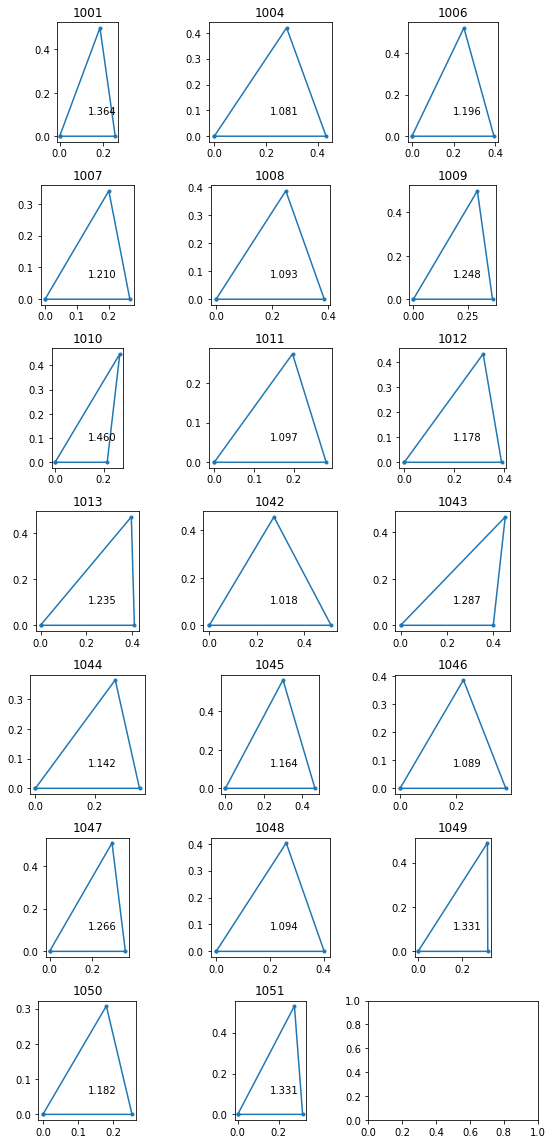

In [8]:
plot_for_groups('Sg_')

1.07  ± 0.04 


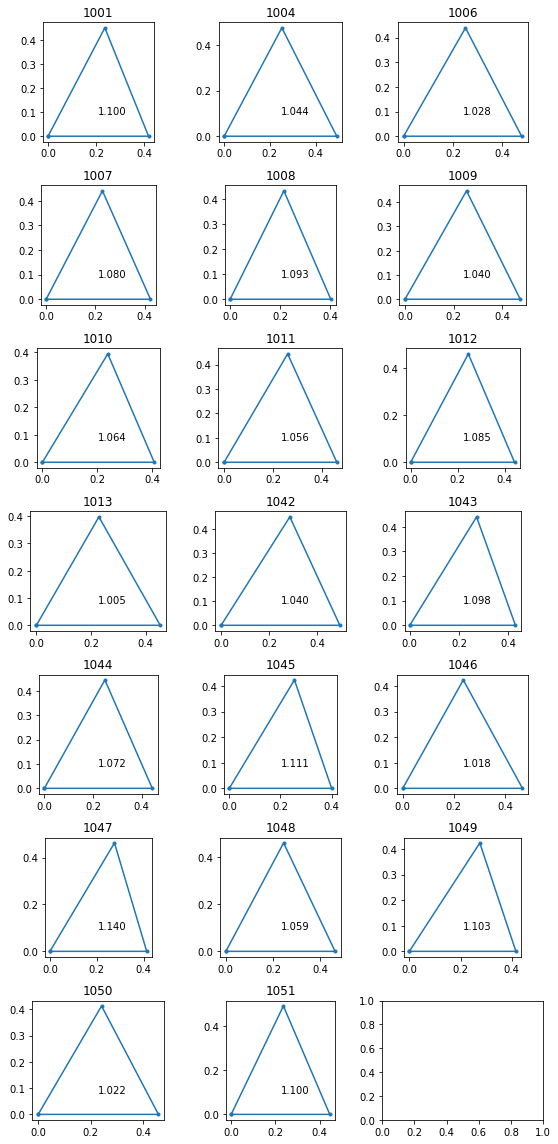

In [9]:
plot_for_groups('resid')

1.11  ± 0.06 


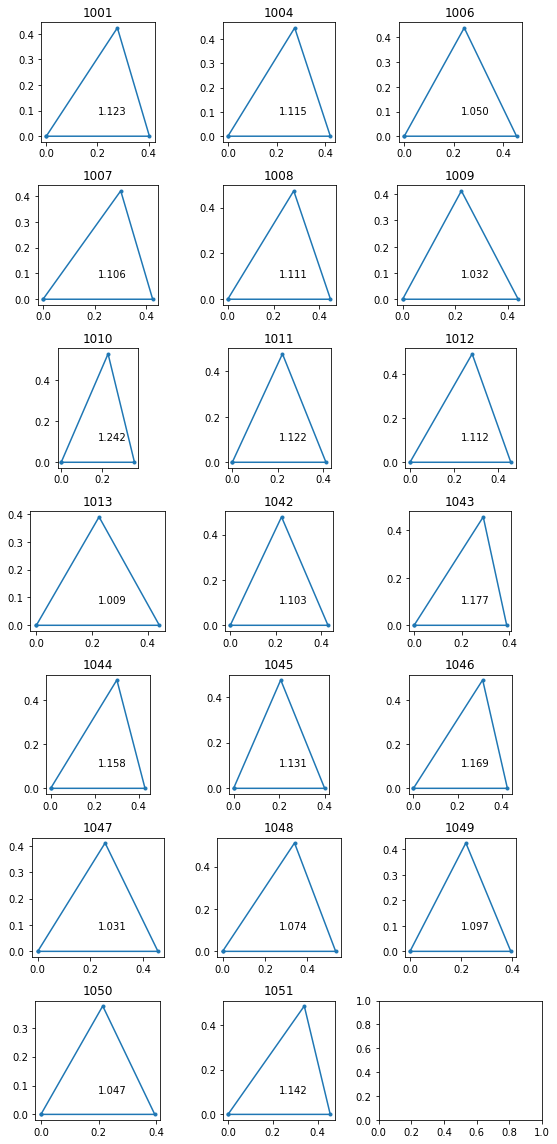

In [10]:
plot_for_groups('rms_')

1.1  ± 0.07 


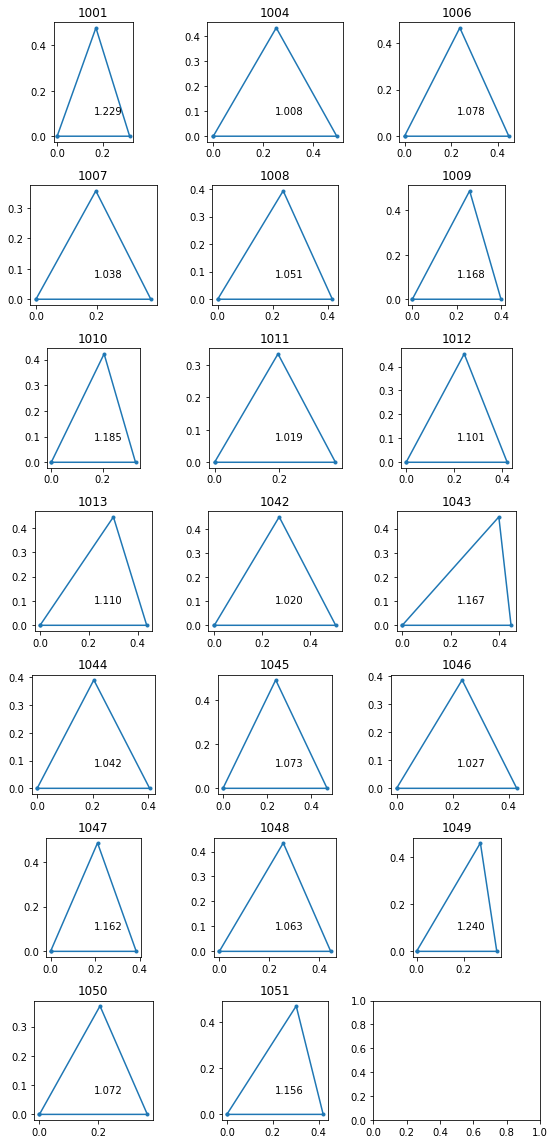

In [11]:
plot_for_groups('Raw_')